## Import

In [1]:
import numpy as np
import cv2

## Rescale of Video Frame

In [2]:
def rescale_frame(frame, scale_percent = 100):
    width = int(frame.shape[1] * scale_percent / 100)
    height = int(frame.shape[0] * scale_percent / 100)
    dim = (width, height)
    return cv2.resize(frame, dim, interpolation = cv2.INTER_AREA)

## Background Substractor

In [3]:
cap = cv2.VideoCapture(r'Video Files\sample1.mp4')

# Various Background Substractor Algorithms
fgbg1 = cv2.bgsegm.createBackgroundSubtractorMOG()
fgbg2 = cv2.createBackgroundSubtractorMOG2(varThreshold = 40, detectShadows = False)
fgbg3 = cv2.createBackgroundSubtractorKNN(dist2Threshold = 250, detectShadows = False)

while True:
    ret, frame = cap.read()
    if frame is None:
        break
    
    frame = rescale_frame(frame, 40)
    
    fgmask1 = fgbg1.apply(frame);
    fgmask2 = fgbg2.apply(frame);
    fgmask3 = fgbg3.apply(frame);
    
    cv2.imshow('Original', frame);
    cv2.imshow('MOG', fgmask1);
    cv2.imshow('MOG2', fgmask2);
    cv2.imshow('KNN', fgmask3);

    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()

#  A Sample of the working Code

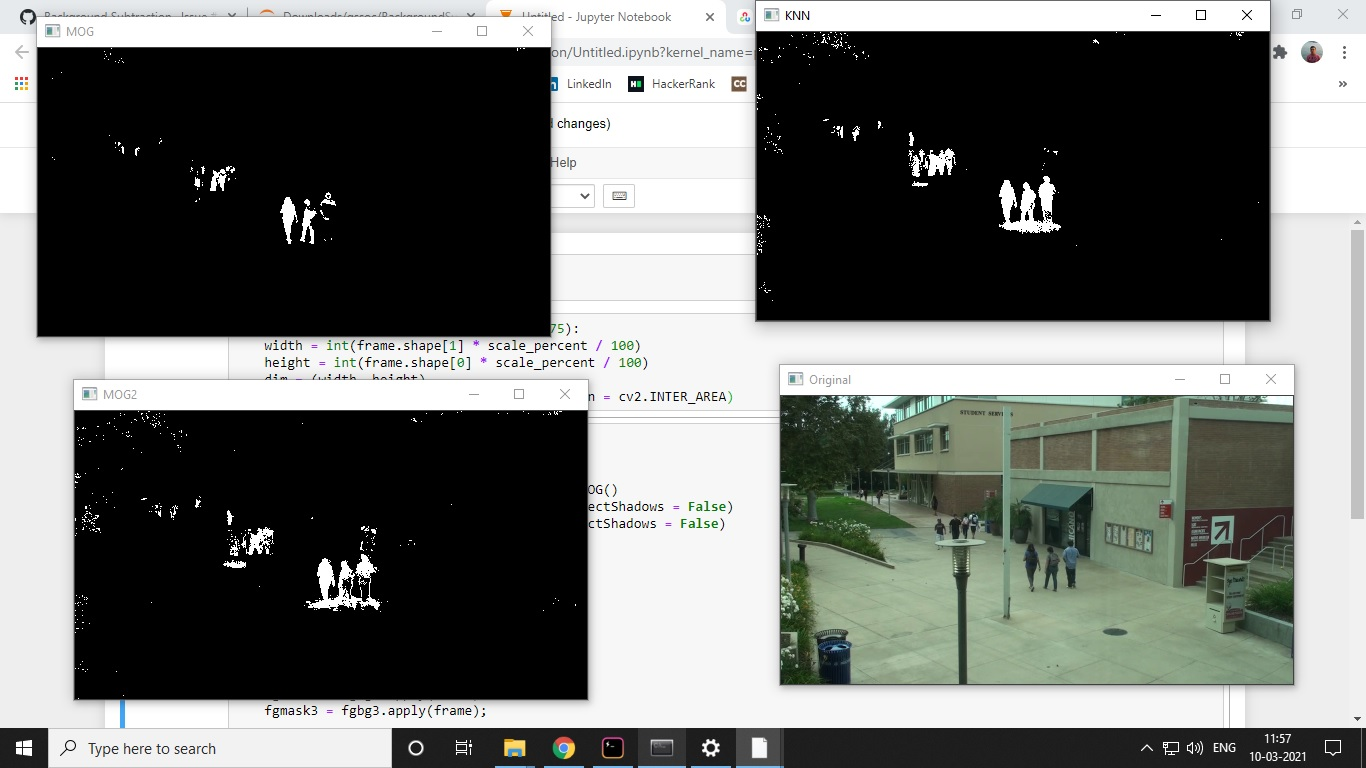